In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tqdm import tqdm

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ews_analysis import hopf_helper as hh
from ews_analysis.saddlenode_ews import dSdt as sd_model
from ews_analysis.pitchfork_helper import *
from ews_helper import get_ews, itoEulerMaruyama

from scipy.integrate import odeint, solve_ivp


## Saddle-Node

In [2]:
def plot_bif_sim(fig, axs, time, results, derivatives):

    if not isinstance(axs, np.ndarray):
        axs = np.array([axs])
    
    axs[0].plot(time, results[:,0])
    axs[0].set_xlabel('Time')
    # make ax grey
    axs[0].set_facecolor(plt.cm.gray(.85))

    # plot t_star, where r(t) = 0 = r0 + epsilon*t 
    t_star = time[np.where(results[:,1] >= 0)[0][0]]
    axs[0].axvline(t_star, c='r', ls='--') #label=f't*={t_star:.2f}'

    # ax.set_ylim(-20, 70)
    # axs[0].legend()
    axs[0].grid()
    return fig, axs, t_star

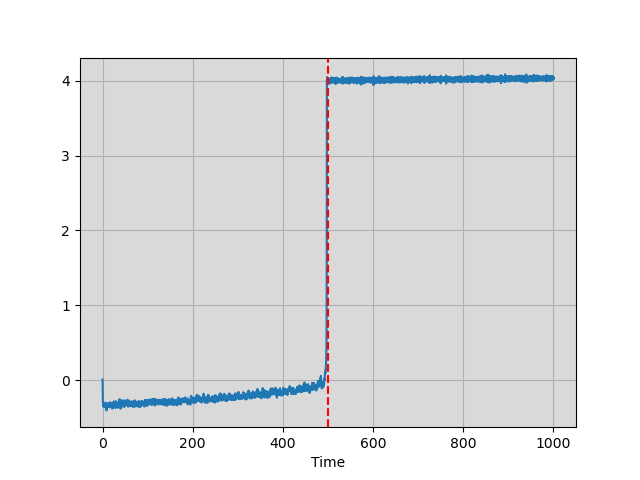

In [3]:
# f = np.load('tmp_figs/sd_bif_sim.npz')
f = np.load('tmp_figs/sd_with_yuval_bif.npz')

time=f['time'] 
results=f['results']
derivatives=f['derivatives']

fig, axs = plt.subplots(1)
fig, axs, t_star = plot_bif_sim(fig, axs, time, results, derivatives)

(10000,)


100%|██████████| 195/195 [00:00<00:00, 5095.12it/s]


Text(0.5, 0.98, 'Saddle-Node Bifurcation: $\\dot{x}$ = r + a$x^2$ - $x^3$,    $\\dot{r}$ = $\\epsilon$')

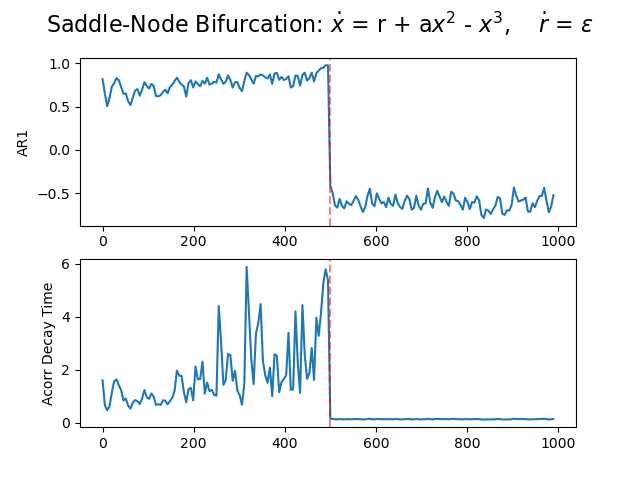

In [4]:
"""
time = np.arange(0, 9, 0.001)
r0 = -3
x0 = 0.1
a = 80
epsilon = 1.5
sigma = 0.33
"""

win_size = ews_win_size = 101
offset = ews_offset = win_size//2 + 1

print(time.shape)

block_idxs_sd, ar1s_sd, decays_sd, vars_sd = get_ews(
    time, results[:,0], win_size=win_size, offset=offset
)

ews_fig, ews_axs = plt.subplots(2,1)

# Plot AR1s
ews_axs[0].plot(time[block_idxs_sd[:len(ar1s_sd)]], ar1s_sd)
ews_axs[0].axvline(
    t_star, color='r', linestyle='--', 
    alpha=0.5, label='x=0'
)
ews_axs[0].set_ylabel('AR1')

# Plot Decays
ews_axss[1].plot(time[block_idxs_sd[:len(decays_sd)]], decays_sd)
ews_axs[1].axvline(
    t_star, color='r', linestyle='--', 
    alpha=0.5, label='x=0'
)
ews_axs[1].set_ylabel('Acorr Decay Time')
ttl = r'Saddle-Node Bifurcation: $\dot{x}$ = r + a$x^2$ - $x^3$,    $\dot{r}$ = $\epsilon$'
ews_fig.suptitle(ttl, fontsize=16)

## Pitchfork

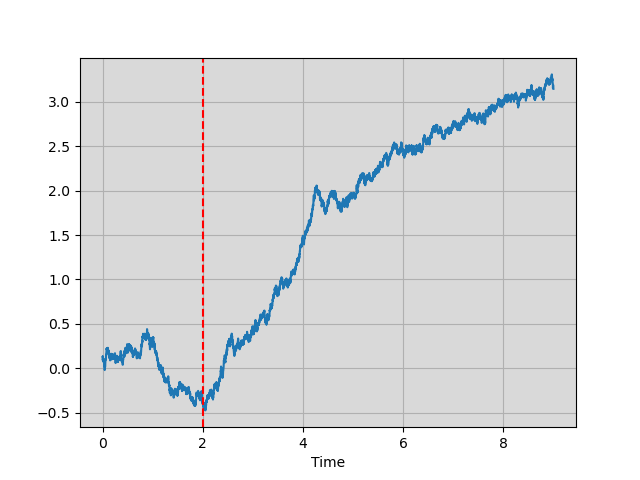

In [5]:
# f = np.load('tmp_figs/pf_bif_sim.npz')
# time=f['time'] 
# results=f['results']
# derivatives=f['derivatives']

# fig, axs = plt.subplots(1)
# fig, axs, t_star = plot_bif_sim(fig, axs, time, results, derivatives)

(9000,)


100%|██████████| 87/87 [00:00<00:00, 614.96it/s]


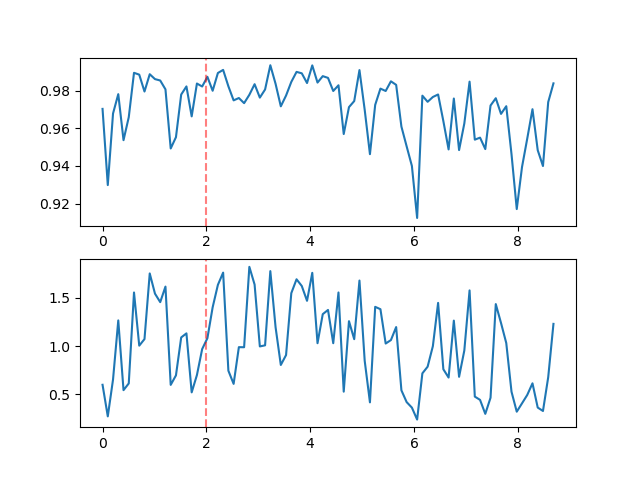

In [6]:
# win_size = ews_win_size = 301
# offset = ews_offset = 101

# print(time.shape)

# block_idxs, ar1s, decays, vars = get_ews(
#     time, results[:,0], win_size=win_size, offset=offset
# )

# ews_fig, ews_axs = plt.subplots(2,1)

# # Plot AR1s
# ews_axs[0].plot(time[block_idxs[:len(ar1s)]], ar1s)
# ews_axs[0].axvline(
#     t_star, color='r', linestyle='--', 
#     alpha=0.5, label='x=0'
# )

# # Plot Decays
# ews_axs[1].plot(time[block_idxs[:len(decays)]], decays)
# ews_axs[1].axvline(
#     t_star, color='r', linestyle='--', 
#     alpha=0.5, label='x=0'
# )

In [7]:
"""
1. detrending the signal
per trajectory - when does it jump - i.e. signal chnages > 20% in a short time (say 40 ms)
linearly approximate the signal pre-jump and subtract from signal to remove upwards trend

2. ar1s???

3. divergence of sim away from x_dot roots plot
"""

'\n1. detrending the signal\nper trajectory - when does it jump - i.e. signal chnages > 20% in a short time (say 40 ms)\nlinearly approximate the signal pre-jump and subtract from signal to remove upwards trend\n\n2. ar1s???\n\n3. divergence of sim away from x_dot roots plot\n'

In [8]:
# a = np.random.normal(size=(1000))
# tmp_a = a - np.mean(a)
# ar1 = np.correlate(tmp_a, tmp_a, mode='full') / (np.cov(a)* (l-1))

# plt.plot(ar1)

NameError: name 'l' is not defined